In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [2]:
imaging_data = pd.read_csv("toy_data_imaging.csv")
imaging_data = imaging_data.loc[imaging_data["diagnosis"] == 1,:]
imaging_minimal = imaging_data.iloc[:,2:]
y = imaging_data.iloc[:,1]
print(imaging_data)


     participant_id  diagnosis      roi0      roi1      roi2      roi3  \
600      subject600        1.0  1.064109  0.953707  1.034319  1.020244   
601      subject601        1.0  1.045436  0.933038  1.056347  1.024579   
602      subject602        1.0  1.046640  1.077168  1.047961  0.865588   
603      subject603        1.0  0.746936  1.070795  1.024257  1.166989   
604      subject604        1.0  1.104929  1.004432  1.097849  1.077099   
...             ...        ...       ...       ...       ...       ...   
1795    subject1795        1.0  0.995731  0.902431  1.062839  0.888057   
1796    subject1796        1.0  1.110225  1.005496  0.918571  1.050134   
1797    subject1797        1.0  0.980747  1.100119  1.013491  0.867414   
1798    subject1798        1.0  0.913652  0.943914  0.826538  1.054494   
1799    subject1799        1.0  0.991884  1.077665  1.048818  0.872075   

          roi4      roi5      roi6      roi7  ...    roi135    roi136  \
600   0.702135  0.882553  1.133318  1.

[0.10312374 0.06725271]
[[-0.45934299  0.09533456]
 [-0.37639986  0.27919481]
 [-0.46595251 -0.53384496]
 ...
 [ 0.00751909  0.23714815]
 [-0.15508066 -0.54221539]
 [ 0.02296227  0.17101935]]


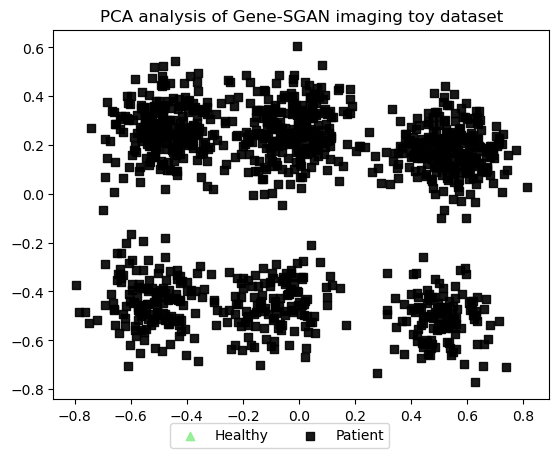

In [4]:
fig, ax = plt.subplots()
# PCA
pca = PCA(n_components=2,random_state=42)

pca_result = pca.fit_transform(imaging_minimal)
print(pca.explained_variance_ratio_)
print(pca_result)


for l, c, m in zip([-1,1], ["lightgreen", "black"], ('^', 's')):
    ax.scatter(pca_result[y == l, 0],
                pca_result[y == l, 1],
                color=c,
                label='cluster %s' % l,
                alpha=0.9,
                marker=m
                )

plt.title("PCA analysis of Gene-SGAN imaging toy dataset")
labels = ["Healthy","Patient"]
fig.legend(labels, loc='lower center',ncol=len(labels))

In [3]:
clusters_rf = pd.read_csv("rf_agglom_clusters2.csv")

In [4]:
print(clusters_rf)


           0    1
0        0.0  2.0
1        1.0  1.0
2        2.0  2.0
3        3.0  2.0
4        4.0  2.0
...      ...  ...
1195  1195.0  1.0
1196  1196.0  2.0
1197  1197.0  2.0
1198  1198.0  2.0
1199  1199.0  2.0

[1200 rows x 2 columns]


0       2.0
1       1.0
2       2.0
3       2.0
4       2.0
       ... 
1195    1.0
1196    2.0
1197    2.0
1198    2.0
1199    2.0
Name: 1, Length: 1200, dtype: float64


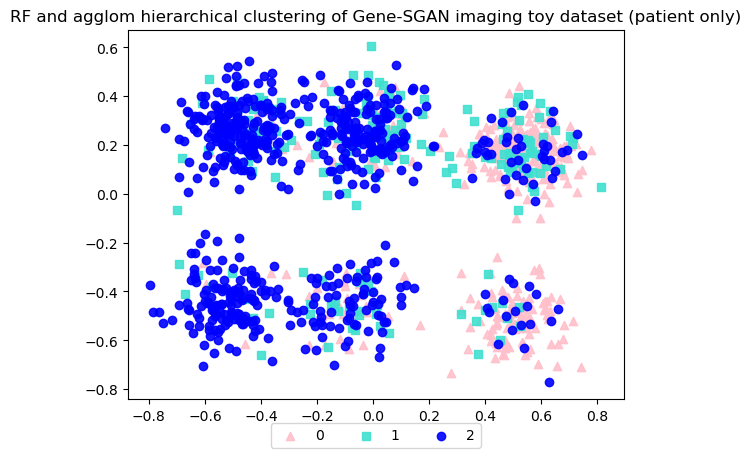

In [7]:
fig, ax = plt.subplots()

pca = PCA(n_components=2,random_state=42)

pca_result = pca.fit_transform(imaging_minimal)

y = clusters_rf.iloc[:,1]
print(y)
for l, c, m in zip([0,1,2], ["pink", "turquoise", "blue"], ('^', 's', "o")):
    ax.scatter(pca_result[y == l, 0],
                pca_result[y == l, 1],
                color=c,
                label='cluster %s' % l,
                alpha=0.9,
                marker=m
                )

plt.title("RF and agglom hierarchical clustering of Gene-SGAN imaging toy dataset (patient only)")
labels = ["0","1", "2"]
fig.legend(labels, loc='lower center',ncol=len(labels))